# Reducing Market Waste ( Hackerearth ML Competition )

## Problem Statement

The company has products which can be used for hiring assessments. The task is to predict the probability percentage that a client will purchase a product from the features provided in the dataset.

## Dataset Description

The dataset contains the following files :

           1. train.csv : 7007 x 23  
           2. test.csv  : 2093 x 22
           3. sample_submission.csv : 5 x 2

In [2]:
#importing neccessary modules
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report 

In [3]:
import os

path = os.getcwd()

print("Currently at", path)

Currently at C:\Users\Sarthak\Desktop\Reducing Market Waste


## Loading the training dataset

In [4]:
data_train = pd.read_csv(path+"/dataset/train.csv")
data_train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [5]:
print(data_train.info)

<bound method DataFrame.info of       Deal_title                         Lead_name               Industry  \
0     TitleM5DZY     Davis, Perkins and Bishop Inc            Restaurants   
1     TitleKIW18                    Bender PLC LLC  Construction Services   
2     TitleFXSDN             Carter-Henry and Sons      Hospitals/Clinics   
3     TitlePSK4Y                    Garcia Ltd Ltd            Real Estate   
4     Title904GV                  Lee and Sons PLC     Financial Services   
...          ...                               ...                    ...   
7002  TitleJ7TDY                 Flowers-Adams PLC                  Banks   
7003  TitleO1IIN  Kelly, Smith and Benton and Sons      Hospitals/Clinics   
7004  TitleF1FWY                 Romero-Juarez PLC         Semiconductors   
7005  TitleXVBNJ  Sullivan, Mooney and Elliott LLC                  Banks   
7006  TitleKXU3H                Jones LLC and Sons     Financial Services   

     Deal_value Weighted_amount Date_of_cre

In [6]:
data_train.describe()

,Internal_rating,Success_probability
count,7007.000000,7007.000000
mean,3.009562,64.745133
std,1.418666,17.931635
min,1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,5.000000,107.340000


In [7]:
data_train.describe(include='all')

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
count,7007,7007,7006,6956,6482,7007,7007,7007,7007,7007,...,7007,7007,7007,7007,7007,6374,7007,6858,7007.000000,7007.000000
unique,7007,7007,171,6907,6480,777,2,7007,3,4,...,10,7007,639,4,3,11,60,6,NaN,NaN
top,Title2LXRP,"Rodriguez, Schultz and Lewis Group",Banks,445634$,684031.5$,2019-01-22,Product_1,001-352-388-7465x187,500 Million - 1 Billion,Category 3,...,CEO,stevenmejia@marquezjohnson.com,Film/video editor,Marketing Event,Level 1,Following up but lead not responding,"Hebron,Artenia D",No,NaN,NaN
freq,1,1,1480,2,2,18,3504,1,2377,1791,...,748,1,22,1824,2409,627,136,1179,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.009562,64.745133
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.418666,17.931635
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,60.600000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,65.300000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,69.600000


## Check for missing values

In [8]:
data_train.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

From the output, we can clearly see that the data contains a lot of **missing values** particularly in columns such as **Deal_value, Weighted_amount, Geography, Location, Last_lead_update** and **Resource**

In [9]:
## Data formatting
data_train['Deal_value'] = data_train['Deal_value'].str.replace('$', '')
data_train['Weighted_amount'] = data_train['Weighted_amount'].str.replace('$', '')
data_train['Deal_value']=data_train['Deal_value'].astype('float')
data_train['Weighted_amount']=data_train['Weighted_amount'].astype('float')
data_train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.8,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [10]:
## Dropping the insignificant columns
data_train.drop(["Lead_name","Industry","Date_of_creation","Contact_no","Location","POC_name","Designation","Lead_POC_email","Hiring_candidate_role","Lead_source","Last_lead_update","Internal_POC","Resource"], axis=1, inplace=True)

In [11]:
data_train.head()

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Level_of_meeting,Internal_rating,Success_probability
0,TitleM5DZY,320506.0,2067263.7,Product_2,50 - 100 Million,Category 2,USA,Level 3,3,73.6
1,TitleKIW18,39488.0,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Level 1,5,58.9
2,TitleFXSDN,359392.0,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,Level 1,4,68.8
3,TitlePSK4Y,76774.0,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,Level 2,1,64.5
4,Title904GV,483896.0,NaN,Product_2,50 - 100 Million,Category 3,India,Level 2,4,62.4


In the table, we have a feature which is categorical in nature. The **Pitch, Lead_revenue, Fund_category, Geography and Level_of_meeting** columns represent categorical values. To convert them to integral values we use a simple **get_dummies()** function in **pandas** module.

In [12]:
## Converting columns containing categorical values to integral values

##Pitch
p=pd.get_dummies(data_train['Pitch'],drop_first=True)


##Lead_revenue
lr=pd.get_dummies(data_train['Lead_revenue'],drop_first=True)


##Fund_category
fc=pd.get_dummies(data_train['Fund_category'],drop_first=True)


##Geography
g=pd.get_dummies(data_train['Geography'],drop_first=True)


##Level_of_meeting
lm=pd.get_dummies(data_train['Level_of_meeting'],drop_first=True)


In [13]:
p.head()

,Product_2
0,1
1,1
2,0
3,1
4,1


In [14]:
lr.head()

,50 - 100 Million,500 Million - 1 Billion
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [15]:
fc.head()

,Category 2,Category 3,Category 4
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [16]:
g.head()

,USA
0,1
1,0
2,1
3,1
4,0


In [17]:
lm.head()

,Level 2,Level 3
0,0,1
1,0,0
2,0,0
3,1,0
4,1,0


In [18]:
## Concatenating the converted columns in the dataframe
data_train=pd.concat([data_train,p,lr,fc,g,lm],axis=1)
data_train.head()

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Level_of_meeting,Internal_rating,Success_probability,Product_2,50 - 100 Million,500 Million - 1 Billion,Category 2,Category 3,Category 4,USA,Level 2,Level 3
0,TitleM5DZY,320506.0,2067263.7,Product_2,50 - 100 Million,Category 2,USA,Level 3,3,73.6,1,1,0,1,0,0,1,0,1
1,TitleKIW18,39488.0,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Level 1,5,58.9,1,0,1,0,0,1,0,0,0
2,TitleFXSDN,359392.0,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,Level 1,4,68.8,0,0,1,0,0,1,1,0,0
3,TitlePSK4Y,76774.0,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,Level 2,1,64.5,1,0,1,0,1,0,1,1,0
4,Title904GV,483896.0,NaN,Product_2,50 - 100 Million,Category 3,India,Level 2,4,62.4,1,1,0,0,1,0,0,1,0


In [19]:
## Dropping the categorical columns
data_train.drop(["Pitch","Lead_revenue","Fund_category","Geography","Level_of_meeting"],axis=1,inplace=True)

In [20]:
data_train.drop(["Deal_title"],axis=1,inplace=True)

In [21]:
data_train.head()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,Product_2,50 - 100 Million,500 Million - 1 Billion,Category 2,Category 3,Category 4,USA,Level 2,Level 3
0,320506.0,2067263.7,3,73.6,1,1,0,1,0,0,1,0,1
1,39488.0,240876.8,5,58.9,1,0,1,0,0,1,0,0,0
2,359392.0,2407926.4,4,68.8,0,0,1,0,0,1,1,0,0
3,76774.0,468321.4,1,64.5,1,0,1,0,1,0,1,1,0
4,483896.0,NaN,4,62.4,1,1,0,0,1,0,0,1,0


In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Deal_value               6956 non-null   float64
 1   Weighted_amount          6482 non-null   float64
 2   Internal_rating          7007 non-null   int64  
 3   Success_probability      7007 non-null   float64
 4   Product_2                7007 non-null   uint8  
 5   50 - 100 Million         7007 non-null   uint8  
 6   500 Million - 1 Billion  7007 non-null   uint8  
 7   Category 2               7007 non-null   uint8  
 8   Category 3               7007 non-null   uint8  
 9   Category 4               7007 non-null   uint8  
 10  USA                      7007 non-null   uint8  
 11  Level 2                  7007 non-null   uint8  
 12  Level 3                  7007 non-null   uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 280.7 KB


In [23]:
## Correcting Missing Values in the dataset
data_train['Deal_value'] = data_train['Deal_value'].fillna((data_train['Deal_value'].mean()))
data_train['Weighted_amount'] = data_train['Weighted_amount'].fillna((data_train['Weighted_amount'].mean()))
data_train['Internal_rating'] = data_train['Internal_rating'].fillna((data_train['Internal_rating'].mean()))
data_train['Success_probability'] = data_train['Success_probability'].fillna((data_train['Success_probability'].mean()))
data_train.head()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,Product_2,50 - 100 Million,500 Million - 1 Billion,Category 2,Category 3,Category 4,USA,Level 2,Level 3
0,320506.0,2.067264e+06,3,73.6,1,1,0,1,0,0,1,0,1
1,39488.0,2.408768e+05,5,58.9,1,0,1,0,0,1,0,0,0
2,359392.0,2.407926e+06,4,68.8,0,0,1,0,0,1,1,0,0
3,76774.0,4.683214e+05,1,64.5,1,0,1,0,1,0,1,1,0
4,483896.0,1.569884e+06,4,62.4,1,1,0,0,1,0,0,1,0


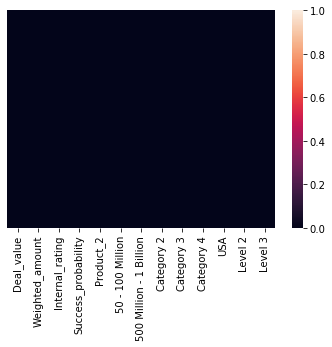

In [24]:
sns.heatmap(data_train.isnull(), yticklabels=False, vmin=0, vmax=1)

## Importing the testing dataset

In [25]:
data_test = pd.read_csv(path+"/dataset/test.csv")
data_test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [26]:
print(data_test.info)

<bound method DataFrame.info of       Deal_title                        Lead_name                   Industry  \
0     TitleAD16O                  Bonilla Ltd Inc  Investment Bank/Brokerage   
1     TitleOW6CR   Williams, Rogers and Roach PLC                Electronics   
2     TitleVVJQ5     Wood, Vaughn and Morales Ltd                      Banks   
3     TitleUS8NA              Durham-Crawford Inc                      Music   
4     Title5VGWW     Simpson, Duncan and Long LLC                Real Estate   
...          ...                              ...                        ...   
2088  Title2R8VU    Phillips, Smith and Jones Inc              BioTech/Drugs   
2089  Title7HCNJ              Elliott-Morales PLC                Real Estate   
2090  TitleCD5YZ               Herrera-Santos PLC   Sales/Marketing Services   
2091  Title8OKXL  Howard, Martinez and Jacobs PLC                      Banks   
2092  TitleHFQT8                  Smith Group LLC   Architecture/Engineering   

     De

In [27]:
data_test.describe()

,Internal_rating
count,2093.000000
mean,3.143354
std,4.510451
min,-1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,82.340000


In [28]:
data_test.describe(include='all')

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
count,2093,2093,2092,2088,2033,2093,2093,2093,2093,2093,...,2091,2093,2093,2093,2093,2093,1925,2093,2079,2093.000000
unique,2093,2093,138,2083,2033,720,2,2093,3,4,...,1745,10,2093,618,4,3,11,60,6,NaN
top,Title1T6W8,Roberson-Coleman and Sons,Banks,81590$,130836.0$,2019-10-05,Product_2,895.944.5114x87917,50 - 100 Million,Category 3,...,pooja,CEO/Co-Founder/Chairman,richardochoa@arias.com,"Conservation officer, historic buildings",Contact Email,Level 1,2 days back,"Georgakopoulos,Vasilios T",Cannot deliver,NaN
freq,1,1,462,2,1,9,1063,1,718,537,...,23,230,1,10,540,739,204,48,384,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.143354
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.510451
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [29]:
## Data formatting 
data_test['Deal_value'] = data_test['Deal_value'].str.replace('$', '')
data_test['Weighted_amount'] = data_test['Weighted_amount'].str.replace('$', '')
data_test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961,2541758.2,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433,3041031.0,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952,1521716.4,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835,2455218.75,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [30]:
## Dropping insignificant columns from the dataset
data_test.drop(["Lead_name","Industry","Date_of_creation","Contact_no","Location","POC_name","Designation","Lead_POC_email","Hiring_candidate_role","Lead_source","Last_lead_update","Internal_POC","Resource"], axis=1, inplace=True)

In [31]:
## Converting columns with categorical values to integral values using pd.get_dummies() 
p=pd.get_dummies(data_test['Pitch'],drop_first=True)                     ## for Pitch
lr=pd.get_dummies(data_test['Lead_revenue'],drop_first=True)             ## for Lead_revenue
fc=pd.get_dummies(data_test['Fund_category'],drop_first=True)            ## for Fund_category
g=pd.get_dummies(data_test['Geography'],drop_first=True)                 ## for Geography
lm=pd.get_dummies(data_test['Level_of_meeting'],drop_first=True)         ## for Level_of_meeting
data_test=pd.concat([data_test,p,lr,fc,g,lm],axis=1)                     ## Concatenation into dataframe
data_test.drop(["Pitch","Lead_revenue","Fund_category","Geography","Level_of_meeting"],axis=1,inplace=True)  ## removing categorical features

In [32]:
data_test.head()

,Deal_title,Deal_value,Weighted_amount,Internal_rating,Product_2,50 - 100 Million,500 Million - 1 Billion,Category 2,Category 3,Category 4,USA,Level 2,Level 3
0,TitleAD16O,200988,NaN,-1.0,0,0,0,0,0,1,0,0,0
1,TitleOW6CR,409961,2541758.2,1.0,0,0,0,0,1,0,1,1,0
2,TitleVVJQ5,434433,3041031.0,5.0,0,0,0,0,0,0,1,1,0
3,TitleUS8NA,218952,1521716.4,5.0,1,0,0,0,0,0,0,0,1
4,Title5VGWW,392835,2455218.75,2.0,0,0,1,0,1,0,1,0,1


In [33]:
df=pd.DataFrame(data_test,columns=["Deal_title"])

In [34]:
df.head()

,Deal_title
0,TitleAD16O
1,TitleOW6CR
2,TitleVVJQ5
3,TitleUS8NA
4,Title5VGWW


In [35]:
## Data formatting
data_test['Deal_value']=data_test['Deal_value'].astype('float')
data_test['Weighted_amount']=data_test['Weighted_amount'].astype('float')

In [36]:
## Correcting missing values
data_test['Deal_value'] = data_test['Deal_value'].fillna((data_train['Deal_value'].mean()))
data_test['Weighted_amount'] = data_test['Weighted_amount'].fillna((data_train['Weighted_amount'].mean()))
data_test['Internal_rating'] = data_test['Internal_rating'].fillna((data_train['Internal_rating'].mean()))

In [37]:
data_test.drop(["Deal_title"],axis=1,inplace=True)

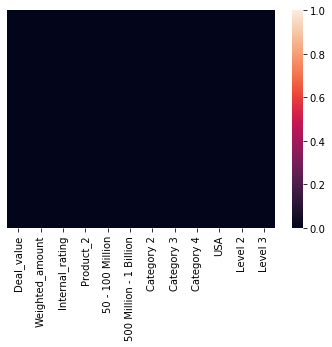

In [38]:
sns.heatmap(data_test.isnull(), yticklabels=False, vmin=0, vmax=1)

In [39]:
data_test.head() 

,Deal_value,Weighted_amount,Internal_rating,Product_2,50 - 100 Million,500 Million - 1 Billion,Category 2,Category 3,Category 4,USA,Level 2,Level 3
0,200988.0,1.569884e+06,-1.0,0,0,0,0,0,1,0,0,0
1,409961.0,2.541758e+06,1.0,0,0,0,0,1,0,1,1,0
2,434433.0,3.041031e+06,5.0,0,0,0,0,0,0,1,1,0
3,218952.0,1.521716e+06,5.0,1,0,0,0,0,0,0,0,1
4,392835.0,2.455219e+06,2.0,0,0,1,0,1,0,1,0,1


In [40]:
x_train = data_train.drop(['Success_probability'], axis=1)
y_train = data_train['Success_probability']
x_test=data_test

## Training data on XGBoost model

In [41]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
xgbost= xg_reg.predict(x_test)
df["Success_probability"]=xgbost
df.head()

[14:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,Deal_title,Success_probability
0,TitleAD16O,41.137135
1,TitleOW6CR,42.775093
2,TitleVVJQ5,43.081978
3,TitleUS8NA,42.441956
4,Title5VGWW,43.842171


In [42]:
df.to_csv("xg_boost.csv")

In [43]:
df

,Deal_title,Success_probability
0,TitleAD16O,41.137135
1,TitleOW6CR,42.775093
2,TitleVVJQ5,43.081978
3,TitleUS8NA,42.441956
4,Title5VGWW,43.842171
...,...,...
2088,Title2R8VU,43.646858
2089,Title7HCNJ,43.081978
2090,TitleCD5YZ,41.444019
2091,Title8OKXL,41.319359
